# Project: Wrangling and Analyze Data

##### This project involves the following:
1. Gathering the data from multiple sources
2. Assessing the data visually and programmatically to identify quality and tidiness issues
3. Cleaning the data

##### Importing the needed packages

In [1]:
import numpy as np
import pandas as pd
import requests
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import json
import datetime
from timeit import default_timer as timer
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

%matplotlib inline

## Data Gathering

The steps taken here include:

1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) and reading it into the pandas dataframe as archive.
2. Using the Requests library to download the tweet image prediction tsv file (image_predictions.tsv) and reading it into a pandas dataframe images.
3. Using the Tweepy library to query additional data via the Twitter API, saving it into a txt file (tweet_json.txt) and reading it line by line into a pandas dataframe as tweets.

##### Reading .csv file into pandas dataframe

In [2]:
archive = pd.read_csv('twitter_archive_enhanced.csv')

###### Downloading the image prediction tsv file programmatically using the requests library

In [3]:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects = True)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)

In [4]:
#Reading the tsv file into the pandas dataframe

images = pd.read_csv('image-predictions.tsv', sep = '\t')

##### Using the Tweepy library to query additional data via the Twitter API

In [5]:
#Twitter API authentication 

consumer_key = 'CONSUMER KEY'
consumer_secret = 'CONSUMER SECRET'
access_token = 'ACCESS TOKEN'
access_secret = 'ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Querying Twitter's API for JSON data for each tweet_id in the archive dataframe
tweet_ids = archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

# Saving JSON returned in a tweet_json.txt file
# Writing to a txt file using a context manager
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 272


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Rate limit reached. Sleeping for: 238


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

In [7]:
#Creating an empty list
df_list =[]

#Reading the txt file line by line and appending the tweet_id, favorite_count and retweet_count into the empty list
with open ('tweet_json.txt', 'r') as json_file:
    for lines in json_file:
        json_data = json.loads(lines)
        tweet_id = json_data['id']
        created_at = json_data['created_at']
        favorite_count = json_data['favorite_count']
        retweet_count = json_data['retweet_count']
        df_list.append({'tweet_id' : tweet_id,
          'date_created' : created_at,
          'favorite_count' : favorite_count,
          'retweet_count' : retweet_count})

#Creating a data frame 'tweets' from the list
tweets = pd.DataFrame(df_list, columns=['tweet_id', 'date_created', 'favorite_count', 'retweet_count'])

## Assessing Data
In this section the goal is to apply visual assessment and programmatic assesments to the dataframes to detect quality issues and tidiness issues.


### Visual Assessment

In [8]:
#Assessing the archive dataframe visually

archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
#Assessing the images dataframe visually

images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
#Assessing the tweets dataframe visually

tweets

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33713,6975
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29234,5276
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,21982,3466
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36808,7197
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35195,7721
...,...,...,...,...
2322,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,88,36
2323,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,246,115
2324,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,100,36
2325,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,112,39


### Programmatic Assessment

##### Archive Dataframe

In [11]:
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oscar. He can wave. Friendly af. 12/10...,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
197,854482394044301312,NaN,NaN,2017-04-18 23:50:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arya. She can barely contain her excit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854482394...,13,10,Arya,None,None,None,None
1821,676582956622721024,NaN,NaN,2015-12-15 02:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vinnie. He's having fun while being safe....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676582956...,8,10,Vinnie,None,None,None,None
1862,675432746517426176,NaN,NaN,2015-12-11 21:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday. Here's some golden puppers. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675432746...,12,10,None,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
1588,686730991906516992,NaN,NaN,2016-01-12 02:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this picture. 12/10 lovely af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686730991...,12,10,None,None,None,None,None
2055,671362598324076544,NaN,NaN,2015-11-30 16:18:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tanner. He accidentally dropped all hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671362598...,11,10,Tanner,None,None,None,None
1742,679462823135686656,NaN,NaN,2015-12-23 00:45:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hurley. He's the curly one. He hugs every...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,NaN,NaN,NaN,https://twitter.com/bvuepd/status/804417859124...,13,10,None,None,None,None,None


In [12]:
#Concise summary of the dataframe

archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
#Checking for null values in the text column

sum(archive.text.isnull())

0

In [14]:
#Checking for duplicated values in the expanded_urls column

sum(archive['expanded_urls'].duplicated())

137

In [15]:
#Checking the counts of the unique values in the name column

archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
#Checking the counts of the unique values in the rating_numerator and rating_denominator columns

print(archive['rating_numerator'].value_counts())
print(archive['rating_denominator'].value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64


##### Images Dataframe

In [17]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
#Conscise summary of the images dataframe

images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#Checking the counts of the unique values in the img_num column

images['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [20]:
#Checking the counts of unique values in the jpg_url column 

images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

##### Tweets Dataframe

In [21]:
tweets.head()

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33713,6975
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29234,5276
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,21982,3466
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36808,7197
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35195,7721


In [22]:
#Conscise summary of the tweets dataframe

tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   int64 
 1   date_created    2327 non-null   object
 2   favorite_count  2327 non-null   int64 
 3   retweet_count   2327 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [23]:
#Descriptive Statistics of the tweets dataframe

tweets.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7029.734852,2459.911474
std,6.820795e+16,10923.768411,4165.982814
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1220.500000,492.500000
50%,7.178418e+17,3039.000000,1144.000000
75%,7.986547e+17,8568.500000,2846.000000
max,8.924206e+17,144236.000000,70371.000000


In [24]:
#Checking all the columns in the tweets dataframe for null values

tweets.isnull().any()

tweet_id          False
date_created      False
favorite_count    False
retweet_count     False
dtype: bool

In [25]:
#Checking for duplicate columns in the three dataframes

all_columns = pd.Series(list(archive) + list(images) + list(tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues

##### Archive dataframe
1. Tweet_id has the datatype "int" instead of "object". FIXED

2. Timestamp and retweeted_status_timestamp columns have the datatype "object" instead of "datetime". FIXED

3. Null values in some columns are represented as "None" instead of "NaN". FIXED

4. The datatype in columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' and 'retweeted_status_user_id' are 'float' but should be "object" to prevent calculations occuring on them. FIXED

5. There are duplicated values in the "expanded_urls" column. FIXED

6. Invalid dog names such as "None", "a", "the", "not", "quite", "very", "just", "by", "an", "all". FIXED 

##### Images dataframe
7. There are duplicated values in the "jpeg_url" column. FIXED

8. Tweet_id has the datatype "int" instead of "object"  FIXED

##### Tweets dataframe
9. The column "date_created" has datatype "object" instead of datetime. FIXED

10. Tweet_id has the datatype "int" instead of "object". FIXED



### Tidiness issues
1. Dog stages are in different columns. FIXED

2. We just want original tweets. FIXED

3. There is incomplete data in the images data with 2075 rows as compared to 2356 rows in the archive data.

4. Incomplete data in the tweets data with 2327 rows as compared to 2356 rows in the archive data. 

5. Breed Predictions, Confidence intervals and Dog tests are spread in three columns. FIXED

7. The column date_created in the tweets dataframe exists in the archive dataframe as timestamp. FIXED

8. All dataframes should be merged into a single dataframe on tweet_id. FIXED

### Cleaning Data
All the issues from the dataframes documented above would be taken care of using the define-code-test approach and a tidy master dataframe would be created

In [26]:
# Making copies of original pieces of data

archive_clean = archive.copy()
images_clean = images.copy()
tweets_clean = tweets.copy()

### Issue #1: 
Tweet_id has the datatype "int" instead of "object"

#### Define: 
Convert the tweet_id in the dataframes from 'int' to 'object'.

#### Code

In [27]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
images_clean['tweet_id'] = images_clean['tweet_id'].astype('str')
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype('str')

#### Test

In [28]:
print(archive_clean['tweet_id'].dtype)
print(images_clean['tweet_id'].dtype)
print(tweets_clean['tweet_id'].dtype)

object
object
object


### Issue #2: 
Timestamp and retweeted_status_timestamp column have the datatype "object" instead of "datetime"

#### Define: 
Convert the datatype in the timestamp column from object to datetime with to_datetime

#### Code 

In [29]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

#### Test 

In [30]:
archive_clean[['timestamp', 'retweeted_status_timestamp']].dtypes

timestamp                     datetime64[ns, UTC]
retweeted_status_timestamp    datetime64[ns, UTC]
dtype: object

### Issue #3:
Null values in some columns in the dataframe are represented as "None" instead of "NaN"

#### Define: 

Replace null values represented as 'None' with 'NaN'

#### Code

In [31]:
archive_clean.replace('None', np.nan, inplace=True)

#### Test

In [32]:
archive_clean.head()
print(archive_clean.name.value_counts())
print(archive_clean.doggo.value_counts())
print(archive_clean.floofer.value_counts())
print(archive_clean.pupper.value_counts())
print(archive_clean.puppo.value_counts())

a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: name, Length: 956, dtype: int64
doggo    97
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    257
Name: pupper, dtype: int64
puppo    30
Name: puppo, dtype: int64


### Issue #4:
The datatype in columns  'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' and 'retweeted_status_user_id' are 'float' but should be "object" to prevent calculations occuring on them

#### Define: 

Turn the datatype in columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id' from 'float'  to 'object'.

#### Code

In [33]:
archive_clean['in_reply_to_status_id'] = archive_clean['in_reply_to_status_id'].astype('str')
archive_clean['in_reply_to_user_id'] = archive_clean['in_reply_to_user_id'].astype('str')
archive_clean['retweeted_status_id'] = archive_clean['retweeted_status_id'].astype('str')
archive_clean['retweeted_status_user_id'] = archive_clean['retweeted_status_user_id'].astype('str')

#### Test

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #5: 

Duplicated values in the "expanded_urls" column

#### Define: 

Drop duplicate rows from the expanded_urls column

#### Code

In [35]:
archive_clean.drop_duplicates('expanded_urls', inplace = True)

#### Test

In [36]:
#Check for duplicates in the expanded_url column 

sum(archive_clean['expanded_urls'].duplicated())

0

### Issue #6: 
Invalid dog names such as "None", "a", "the", "not", "quite", "very", "just", "by", "an", "all". Meanwhile some dogs have actual names that can be seen in the text column but do not reflect in the name column

#### Define: 

Search the text column using some sentences that were found to come before names and check if it matches any of the  conditions and return the names. If the name is not found in the text column, return NaN. Use the results to create a new column dog_names in the archive_clean dataframe.

#### Code

In [37]:
#Create an empty list
dog_name = []

#Loop through the text column to check for the names that appear in there but do not reflect in the name column and append the results to the list created
for text in archive_clean['text']:
    #Text that starts with 'Meet' with first letter of the name in uppercase
    if text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_name.append(text.split()[1].strip(',').strip('.'))
      #Text that starts with 'Here we have' with first letter of the name in uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_name.append(text.split()[3].strip(',').strip('.'))
    #Text that starts with 'Say hello to' with first letter of the name in uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_name.append(text.split()[3].strip(',').strip('.'))
    #Text that starts with 'His name is' with first letter of the name in uppercase
    elif text.startswith('His name is ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_name.append(text.split()[3].strip(',').strip('.'))
    #Text that starts with 'This is' with first letter of the name in uppercase
    elif text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_name.append(text.split()[2].strip(',').strip('.'))
    #Text that contains the word 'named' with first letter of the name in uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_name.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    #Text with no name
    else:
        dog_name.append('NaN')

#Saving the result in a new column dog_names
archive_clean['dog_names'] = dog_name

In [38]:
#Fill the null values in the dog_name column with values in the name column 

archive_clean['dog_names'].fillna(archive_clean['name'], inplace = True)

#drop the name column

del archive_clean['name']

In [39]:
#replacing dog names "None", "a", "the", "such", "not", "quite", "very", "just", "by", "an" and "all" with "NaN"
archive_clean['dog_names'].replace('None', np.NAN, inplace =True)
archive_clean['dog_names'].replace('a', np.NAN, inplace =True)
archive_clean['dog_names'].replace('the', np.NAN, inplace =True)
archive_clean['dog_names'].replace('such', np.NAN, inplace =True)
archive_clean['dog_names'].replace('not', np.NAN, inplace =True)
archive_clean['dog_names'].replace('quite', np.NAN, inplace =True)
archive_clean['dog_names'].replace('very', np.NAN, inplace =True)
archive_clean['dog_names'].replace('just', np.NAN, inplace =True)
archive_clean['dog_names'].replace('by', np.NAN, inplace =True)
archive_clean['dog_names'].replace('an', np.NAN, inplace =True)
archive_clean['dog_names'].replace('all', np.NAN, inplace =True)

#### Test

In [40]:
archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_names
1075,739623569819336705,nan,nan,2016-06-06 01:02:55+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo that don't need no human. 12/10...,nan,nan,NaT,https://vine.co/v/iY9Fr1I31U6,12,10,doggo,NaN,NaN,NaN,NaN
119,869772420881756160,nan,nan,2017-05-31 04:27:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dewey (pronounced ""covfefe""). He's hav...",nan,nan,NaT,https://twitter.com/dog_rates/status/869772420...,13,10,NaN,NaN,NaN,NaN,Dewey
1994,672604026190569472,nan,nan,2015-12-04 02:31:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a baby Rand Paul. Curls for days. 11/1...,nan,nan,NaT,https://twitter.com/dog_rates/status/672604026...,11,10,NaN,NaN,NaN,NaN,NaN
1049,743222593470234624,nan,nan,2016-06-15 23:24:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,nan,nan,NaT,https://twitter.com/dog_rates/status/743222593...,12,10,NaN,NaN,pupper,NaN,NaN
266,841833993020538882,nan,nan,2017-03-15 02:10:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174238601360835e+17,4196983835.0,2017-01-06 17:33:29+00:00,https://twitter.com/dog_rates/status/817423860...,13,10,NaN,NaN,NaN,NaN,NaN
1883,674805413498527744,nan,nan,2015-12-10 04:18:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When your entire life is crumbling before you ...,nan,nan,NaT,https://twitter.com/dog_rates/status/674805413...,10,10,NaN,NaN,NaN,NaN,NaN
1615,685268753634967552,nan,nan,2016-01-08 01:16:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hubertson. He's a Carmel Haberdashery....,nan,nan,NaT,https://twitter.com/dog_rates/status/685268753...,10,10,NaN,NaN,pupper,NaN,Hubertson
1515,690989312272396288,nan,nan,2016-01-23 20:07:44+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,nan,nan,NaT,https://vine.co/v/iOZKZEU2nHq,12,10,NaN,NaN,NaN,NaN,NaN
841,766864461642756096,nan,nan,2016-08-20 05:08:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs... this is a ...,7.599237987370516e+17,4196983835.0,2016-08-01 01:28:46+00:00,https://twitter.com/dog_rates/status/759923798...,10,10,NaN,NaN,NaN,NaN,NaN
1186,718540630683709445,nan,nan,2016-04-08 20:46:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Get you a pup that can do both. 10/10 https://...,nan,nan,NaT,https://twitter.com/dog_rates/status/718540630...,10,10,NaN,NaN,NaN,NaN,NaN


In [41]:
archive_clean['dog_names'].value_counts()

NaN           866
Lucy           11
Charlie        10
Tucker          9
Penny           9
             ... 
Leonard         1
Beckham         1
Devón           1
Gert            1
Christoper      1
Name: dog_names, Length: 924, dtype: int64

### Issue #7:
There are duplicated values in the "jpg_url" column in the images dataframe

#### Define:
Drop duplicate rows from the jpg_url column

#### Code

In [42]:
images_clean.drop_duplicates('jpg_url', inplace = True )

#### Test

In [43]:
sum(images_clean['jpg_url'].duplicated())

0

### Issue #8:
The date_created column in the tweets dataframe has the datatype "object" instead of "datetime"

#### Define:

Convert the datatype of the date_created column to datetime

#### Code

In [44]:
tweets_clean['date_created'] = pd.to_datetime(tweets_clean['date_created'])

#### Test 

In [45]:
tweets_clean['date_created'].dtype


datetime64[ns, UTC]

### Issue #9: 

We just want original tweets and retweets are not needed

#### Define: 

The retweet details are contained in  columns 'retweeted_status_id',  'retweeted_status_user_id' and 'retweeted_status_timestamp'. Drop the columns to remove information on retweets.

#### Code 

In [46]:
#Selecting rows with null values i.e not retweets

archive_clean = archive_clean[archive_clean.retweeted_status_id.astype('float').isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.astype('float').isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

In [47]:
#Dropping the retweet columns

archive_clean.drop(archive_clean.iloc[:, 6:9], axis = 1, inplace = True)

#### Test 

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2039 non-null   object             
 1   in_reply_to_status_id  2039 non-null   object             
 2   in_reply_to_user_id    2039 non-null   object             
 3   timestamp              2039 non-null   datetime64[ns, UTC]
 4   source                 2039 non-null   object             
 5   text                   2039 non-null   object             
 6   expanded_urls          2038 non-null   object             
 7   rating_numerator       2039 non-null   int64              
 8   rating_denominator     2039 non-null   int64              
 9   doggo                  80 non-null     object             
 10  floofer                10 non-null     object             
 11  pupper                 221 non-null    object           

### Issue #10: 

We want just original tweets without reply tweets

#### Define: 

Reply tweets are represented in columns 'in_reply_to_status_id' and 'in_reply_to_user_id'. Drop tweet_ids with corresponding values in columns 'in_reply_to_status_id', 'in_reply_to_user_id',

#### Code 

In [49]:
#Selecting rows with null values i.e not replies to tweets

archive_clean = archive_clean[archive_clean['in_reply_to_status_id'].astype('float').isnull()] 
archive_clean = archive_clean[archive_clean['in_reply_to_user_id'].astype('float').isnull()] 

In [50]:
#Dropping the replies columns

archive_clean.drop(archive_clean.iloc[:, 1:3], axis = 1, inplace = True)

#### Test

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   object             
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   expanded_urls       2015 non-null   object             
 5   rating_numerator    2015 non-null   int64              
 6   rating_denominator  2015 non-null   int64              
 7   doggo               79 non-null     object             
 8   floofer             10 non-null     object             
 9   pupper              218 non-null    object             
 10  puppo               21 non-null     object             
 11  dog_names           2015 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #11: 
Dog stages are in different columns

#### Define: 
Melt the columns puppo, pupper, floofer and doggo into one column "dog_stage", check the datatype and check for duplicates. If there are duplicates, drop them

#### Code

In [52]:
archive_clean = pd.melt(archive_clean, id_vars= ['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','dog_names'], 
                        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'] ,var_name = 'stage', value_name ='dog_stage')

archive_clean = archive_clean.drop('stage', axis = 1)

In [53]:
#checking the datatype
print(archive_clean['dog_stage'].dtype)

#Checking the unique values
print(archive_clean['dog_stage'].value_counts())

#checking for duplicates
print(sum(archive_clean['dog_stage'].duplicated()))

object
pupper     218
doggo       79
puppo       21
floofer     10
Name: dog_stage, dtype: int64
8055


In [54]:
#Sorting the dog_stage keeping the first value

archive_clean = archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'first')

In [55]:
#Rechecking the count of the unique values

print(archive_clean['dog_stage'].value_counts())

pupper     209
doggo       79
puppo       20
floofer      9
Name: dog_stage, dtype: int64


In [56]:
#Changing the stage datatype to category

archive_clean['dog_stage'] = archive_clean['dog_stage'].astype('category')

#### Test

In [57]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 9 to 2014
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   object             
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   expanded_urls       2015 non-null   object             
 5   rating_numerator    2015 non-null   int64              
 6   rating_denominator  2015 non-null   int64              
 7   dog_names           2015 non-null   object             
 8   dog_stage           317 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 143.8+ KB


### Issue #12: 

The column date_created in the tweets dataframe exists in the archive dataframe as timestamp

#### Define: 
Drop the date_created column

#### Code

In [58]:
tweets_clean = tweets_clean.drop('date_created', axis = 1)

#### Test 

In [59]:
list(tweets_clean)

['tweet_id', 'favorite_count', 'retweet_count']

### Issue #13:
Breed Predictions, Confidence intervals and Dog tests are spread in three columns

#### Define: 

Create a new column 'breed'. Use np.select() to filter the predictions by conditions which include where the 3 predictions are False (i.e not a dog ), breed will be set as 'None' and returns the breed for the first occurence of 'True'. Then drop the multiple prediction and confidence columns.

#### Code 

In [60]:
#Creating the condition list which determine from which array in choicelist is a dog
conditions = [(images_clean['p1_dog'] == True),
              (images_clean['p2_dog'] == True),
              (images_clean['p3_dog'] == True)]

#Creating the choicelist from which selection conditions for predicted breed are taken
choices = [images_clean['p1'], 
        images_clean['p2'],
        images_clean['p3']]

#Returning the predicted dog breed based on the first successful condition i.e where the corresponding array in the condition list is True
images_clean['breed'] = np.select(conditions, choices, 
                                       default = 'None')

images_clean['breed']
cleansing = images_clean.copy()

In [61]:
#Dropping the prediction and confidence level columns
images_clean.drop(images_clean.iloc[:, 3:12], axis = 1, inplace = True)
images_clean

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua


In [62]:
#Replacing values named 'None' as 'NaN' 
images_clean['breed'].replace('None', np.NAN, inplace =True)


In [63]:
#Dropping the 'NaN' values because it indicates that they're not dogs
images_clean.dropna(subset='breed', axis= 0, inplace= True)

#### Test 

In [64]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1691 non-null   object
 1   jpg_url   1691 non-null   object
 2   img_num   1691 non-null   int64 
 3   breed     1691 non-null   object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


### Issue #14: 
All dataframes should be merged into a single dataframe on tweet_id

#### Define:
Merge archive_clean, images_clean and tweets_clean into one dataframe on tweet_id, drop columns not needed and assess as well.

#### Code

In [65]:
twitter_data_cleaned = archive_clean.merge(images_clean, on = 'tweet_id').merge(tweets_clean, on = 'tweet_id')

#### Test

In [66]:
twitter_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 0 to 1592
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1593 non-null   object             
 1   timestamp           1593 non-null   datetime64[ns, UTC]
 2   source              1593 non-null   object             
 3   text                1593 non-null   object             
 4   expanded_urls       1593 non-null   object             
 5   rating_numerator    1593 non-null   int64              
 6   rating_denominator  1593 non-null   int64              
 7   dog_names           1593 non-null   object             
 8   dog_stage           242 non-null    category           
 9   jpg_url             1593 non-null   object             
 10  img_num             1593 non-null   int64              
 11  breed               1593 non-null   object             
 12  favorite_count      1593 non-null 

##### Cleaning the merged dataframe

In [67]:
#Merging the rating_numerator and rating_denominator columns and converting their datatype to object

twitter_data_cleaned['ratings'] = twitter_data_cleaned['rating_numerator'].astype(str) + '/'+ twitter_data_cleaned['rating_denominator'].astype(str)

In [68]:
#Dropping columns not relevant

twitter_data_cleaned.drop(['expanded_urls', 'rating_numerator', 'rating_denominator', 'img_num'], axis = 1, inplace = True)

In [69]:
#Checking for duplicates

sum(twitter_data_cleaned.duplicated())

0

In [70]:
#Concise summary of the cleaned data

twitter_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 0 to 1592
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1593 non-null   object             
 1   timestamp       1593 non-null   datetime64[ns, UTC]
 2   source          1593 non-null   object             
 3   text            1593 non-null   object             
 4   dog_names       1593 non-null   object             
 5   dog_stage       242 non-null    category           
 6   jpg_url         1593 non-null   object             
 7   breed           1593 non-null   object             
 8   favorite_count  1593 non-null   int64              
 9   retweet_count   1593 non-null   int64              
 10  ratings         1593 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 138.7+ KB


In [71]:
#Testing out changes

twitter_data_cleaned.sample(10)

,tweet_id,timestamp,source,text,dog_names,dog_stage,jpg_url,breed,favorite_count,retweet_count,ratings
885,713177543487135744,2016-03-25 01:35:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lance. Lance doesn't give a shit. 10/1...,Lance,NaN,https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg,whippet,6641,2586,10/10
81,683462770029932544,2016-01-03 01:39:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Hello forest pupper I am house pupper welcome...",NaN,pupper,https://pbs.twimg.com/media/CXwlw9MWsAAc-JB.jpg,Italian_greyhound,2238,620,8/10
1580,666082916733198337,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,pug,92,37,6/10
1591,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,112,39,7/10
1139,683030066213818368,2016-01-01 21:00:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lulu. She's contemplating all her unre...,Lulu,NaN,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,boxer,1996,667,10/10
1005,698703483621523456,2016-02-14 03:01:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He has no respect for POULTRY p...,Rusty,NaN,https://pbs.twimg.com/media/CbJLG0HWwAAV-ug.jpg,Brittany_spaniel,1324,335,7/10
207,743222593470234624,2016-06-15 23:24:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,pupper,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,kuvasz,5719,1728,12/10
151,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,6181,1490,27/10
857,718234618122661888,2016-04-08 00:30:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Suki. She was born with a blurry tail ...,Suki,NaN,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,malamute,3561,912,11/10
193,704347321748819968,2016-02-29 16:47:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphson. He's very confused. Wonderin...,Ralphson,pupper,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,Brittany_spaniel,1443,313,10/10


## Storing Data
Saving the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
twitter_data_cleaned.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In [73]:
#Loading the twitter_archive_master.csv into the pandas dataframe
master_data = pd.read_csv('twitter_archive_master.csv')

### Insights:
The following questions would be answered

1. What are the most owned dog breeds?

2. What are the most popular dog names?

3. What is the most common dog stage?

4. Of the most common dog breed, what are the 5 favorite dogs?

5. What tweet has the highest retweets?

6. What tweet has the highest likes?

7. Is there a correlation between retweet count and favourite count?

##### Question: What are the most owned dog breeds?

In [74]:
master_data.breed.value_counts().head(5)

golden_retriever      148
Labrador_retriever    100
Pembroke               91
Chihuahua              88
pug                    62
Name: breed, dtype: int64

We see that majority of the tweets were posted by people who owned golden_retrievers 

##### Question: What are the most popular dog names?

In [75]:
master_data['dog_names'].value_counts().head()

Tucker     9
Cooper     9
Lucy       9
Charlie    8
Oliver     8
Name: dog_names, dtype: int64

Popular dog names include Tucker, Cooper, Lucy, Charlie and Oliver

##### Question: What is the most common dog stage?

In [76]:
master_data.dog_stage.value_counts()

pupper     156
doggo       60
puppo       19
floofer      7
Name: dog_stage, dtype: int64

The most common dog stage is the pupper stage. These dogs are young doggos but are inexperienced in the ways of a doggo.

##### Question: Of the most common dog breed, what are the 5 favorite dogs?

In [77]:
#The most common dog breed is the Golden Retriever as discovered earlier

#Creating a copy of the master data so it can be querried specifically for this task
data_copy = master_data.copy()

#Querying the copy for the favorite dogs
data_copy.query("breed == 'golden_retriever'", inplace = True)
fav_golden_retrievers = data_copy[['tweet_id', 'dog_names', 'favorite_count']].sort_values('favorite_count', ascending=False)
fav_golden_retrievers.set_index('tweet_id').head(5)

,dog_names,favorite_count
tweet_id,,
870374049280663552,Zoey,73744
733109485275860992,NaN,49251
795464331001561088,NaN,46619
846514051647705089,Barney,41094
883482846933004288,Bella,40057


The 5 favorite dogs based on favorite_count are Zoey, dogs with tweet ids 733109485275860992 and 795464331001561088, Barney and Bella

##### Question: What tweet has the highest retweet?

In [78]:
 master_data[['tweet_id', 'retweet_count']].sort_values('retweet_count', ascending=False).head()

,tweet_id,retweet_count
20,744234799360020481,70371
508,807106840509214720,51452
232,822872901745569793,39781
287,879415818425184262,37289
50,819004803107983360,34436


In [79]:
master_data[master_data['tweet_id'] == 744234799360020481]

,tweet_id,timestamp,source,text,dog_names,dog_stage,jpg_url,breed,favorite_count,retweet_count,ratings
20,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,144236,70371,13/10


The tweet with tweet_id 744234799360020481 has the highest retweet count

##### What tweet has the highest likes i.e favorite count?

In [80]:
master_data[['tweet_id', 'favorite_count']].sort_values('favorite_count', ascending=False).head()

,tweet_id,favorite_count
20,744234799360020481,144236
232,822872901745569793,123721
508,807106840509214720,111252
287,879415818425184262,92538
50,819004803107983360,82426


In [81]:
master_data[master_data['tweet_id'] == 744234799360020481]

,tweet_id,timestamp,source,text,dog_names,dog_stage,jpg_url,breed,favorite_count,retweet_count,ratings
20,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,144236,70371,13/10


The tweet with tweet_id 744234799360020481 has the highest favorite count

##### The oldest tweet in the WeRateDogs archive 

In [82]:
master_data[master_data['timestamp'] == master_data['timestamp'].min()]

,tweet_id,timestamp,source,text,dog_names,dog_stage,jpg_url,breed,favorite_count,retweet_count,ratings
1592,666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,2285,420,8/10


The oldest tweet in the archive is the tweet with tweet_id 

### Visualization

##### Average favourite count for each dog stage

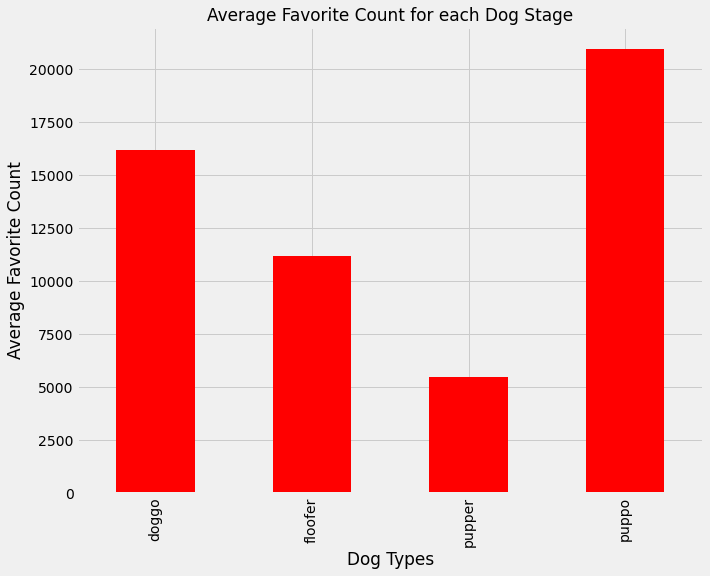

In [83]:
plt.style.use('fivethirtyeight')
master_data.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar', figsize=(10,8), color='r')
plt.xlabel('Dog Types', fontsize=17)
plt.ylabel('Average Favorite Count', fontsize=17)
plt.title('Average Favorite Count for each Dog Stage',  fontsize=17);

From the bar chart above, we can see that the puppo stage had the highest likes (favourite_count) and the pupper stage had the  least likes.

#####  Correlation between retweet count and favorite_count

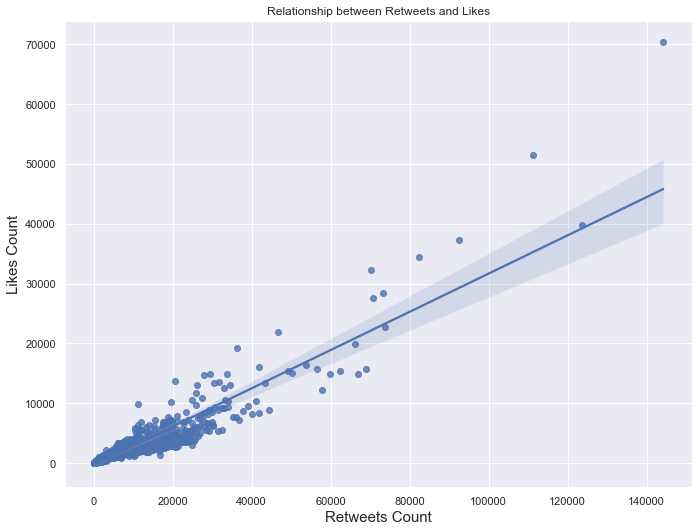

In [84]:
sns.set(rc={'figure.figsize':(10,8)}, style="darkgrid")
sns.regplot(x='favorite_count', y='retweet_count', data=master_data)

plt.xlabel('Retweets Count', fontsize = 15)
plt.ylabel('Likes Count', fontsize = 15)
plt.title('Relationship between Retweets and Likes', fontsize = 15);

In [85]:
master_data.corr().loc['favorite_count','retweet_count']

0.9272329195635844

A strong positive correlation exists between the retweets and the likes of the tweets.

The correlation is 0.9272329195635844

#####  Dog Breed Insight using a word cloud

In [86]:
# creating the text variable
text1 = " ".join(breed for breed in master_data.breed)

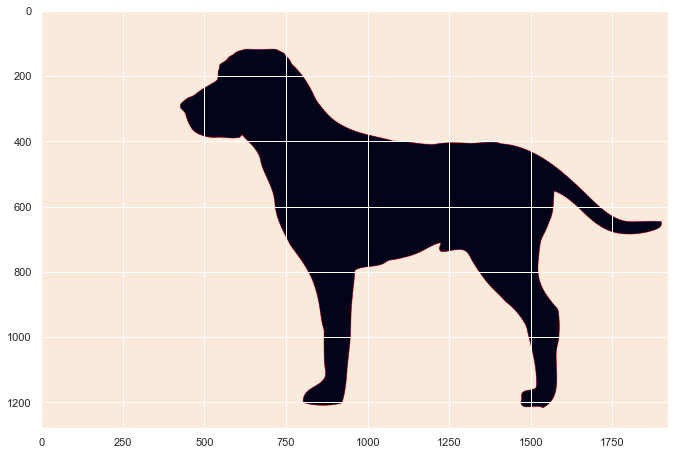

In [87]:
# word cloud will be made with the shape of this image
background_image = np.array(Image.open('Downloads\dogshape.png'))
plt.imshow(background_image)

In [88]:
#Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(background_color = 'white',mask = background_image, 
               width = 2048, height = 1080).generate(text1)

#saving the image
word_cloud.to_file('doggies.png')

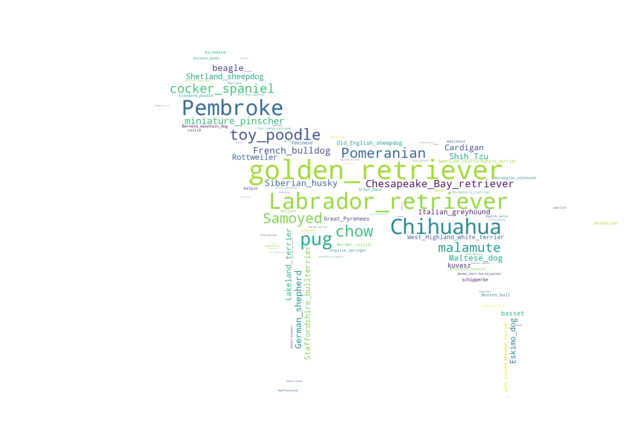

In [89]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()